           time       xH       yH      exH      eyH       xN       yN  \
0   2453746.525 -0.20637  0.30013  0.00256  0.00256  0.04134 -0.18746   
1   2453746.554 -0.20832  0.30582  0.00257  0.00257  0.03867 -0.19174   
2   2454138.287 -0.21088  0.22019  0.00252  0.00197 -0.02627 -0.57004   
3   2454138.304 -0.21132  0.22145  0.00095  0.00204 -0.03107 -0.56624   
4   2454138.351 -0.21515  0.23185  0.00301  0.00206 -0.03009 -0.55811   
5   2454138.368 -0.21402  0.23314  0.00192  0.00230 -0.03133 -0.56000   
6   2454138.418 -0.21705  0.24202  0.00103  0.00282 -0.03134 -0.54559   
7   2454138.435 -0.21449  0.24450  0.00323  0.00254 -0.02791 -0.54794   
8   2454138.484 -0.21818  0.25301  0.00153  0.00224 -0.02972 -0.53385   
9   2454138.501 -0.21807  0.25639  0.00310  0.00291 -0.03226 -0.53727   
10  2454138.551 -0.22173  0.26308  0.00146  0.00230 -0.03429 -0.53079   
11  2454138.567 -0.21978  0.26791  0.00202  0.00226 -0.03576 -0.52712   
12  2454469.653  0.23786 -1.27383  0.00404  0.00824

C:\Users\annas\Anaconda3\lib\site-packages\astropy\coordinates\angles.py:522: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
C:\Users\annas\Anaconda3\lib\site-packages\astropy\coordinates\angles.py:522: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):


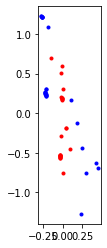

In [8]:
import numpy as np
import pandas as pd
from astropy.time import Time
from astroquery.jplhorizons import Horizons
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import time
from astropy.coordinates import GeocentricMeanEcliptic
from astropy.coordinates import HeliocentricMeanEcliptic
from astropy.coordinates import HeliocentricTrueEcliptic
from astropy.coordinates import GeocentricTrueEcliptic
from astropy.coordinates import BarycentricTrueEcliptic
from astropy.coordinates import BarycentricMeanEcliptic
from astropy import coordinates 
import matplotlib.pyplot as plt

Hiaka2016 = pd.read_csv('haumea_s1hst_2016.txt')
Namaka2016 = pd.read_csv('haumea_s2hst_2016.txt')

#print(Hiaka2016)
#print(Namaka2016)
mixedDF = pd.merge(Hiaka2016, Namaka2016, how='outer', on='time')
paramsDF = mixedDF.sort_values(by=['time'])
paramsDF = paramsDF.reset_index(drop=True)

date = paramsDF['time']
dateList =[]
for i in date:
    jd = Time(i,format='jd')
    dateList.append(jd)
    
print(paramsDF)

Haumea1 = Horizons(id='Haumea',location=None,epochs = dateList)

dist1 = Haumea1.vectors()['range']

hRA1 = Haumea1.ephemerides()['RA']
hDEC1 = Haumea1.ephemerides()['DEC']

deltaRAH = paramsDF['xH']
deltaDECH = paramsDF['yH']
deltaRAN = paramsDF['xN']
deltaDECN = paramsDF['yN']

paramsDF['Date'] = paramsDF['time']
paramsDF['RA-Primary'] = hRA1
paramsDF['DEC-Primary'] = hDEC1

paramsDF['RA-Hiaka'] = deltaRAH/np.cos(hDEC1*np.pi/180)/3600+hRA1
paramsDF['DEC-Hiaka'] = deltaDECH/3600+hDEC1

paramsDF['RA-Namaka'] = deltaRAN/np.cos(hDEC1*np.pi/180)/3600+hRA1
paramsDF['DEC-Namaka'] = deltaDECN/3600+hDEC1

hRA2 = paramsDF['RA-Hiaka']
hDEC2 = paramsDF['DEC-Hiaka']
hRA3 = paramsDF['RA-Namaka']
hDEC3 = paramsDF['DEC-Namaka']

#plt.plot(paramsDF['RA-Primary']-paramsDF['RA-Namaka'],paramsDF['DEC-Primary']-paramsDF['DEC-Namaka'],'r.',paramsDF['RA-Primary']-paramsDF['RA-Hiaka'],paramsDF['DEC-Primary']-paramsDF['DEC-Hiaka'],'b.')
plt.plot(deltaRAH, deltaDECH,'b.', deltaRAN, deltaDECN,'r.')
plt.gca().set_aspect('equal', adjustable='box')



moonHC = SkyCoord(ra=hRA2*u.degree, dec=hDEC2*u.degree, frame='icrs',distance = dist1,unit=(u.degree,u.degree))
moonNC = SkyCoord(ra=hRA3*u.degree, dec=hDEC3*u.degree, frame='icrs',distance = dist1,unit=(u.degree,u.degree))
primC = SkyCoord(ra=hRA1, dec=hDEC1, frame='icrs',distance = dist1,unit=(u.degree,u.degree))

moonHEcl = moonHC.transform_to(HeliocentricMeanEcliptic(equinox='J2000'))
moonNEcl = moonNC.transform_to(HeliocentricMeanEcliptic(equinox='J2000'))
primEcl = primC.transform_to(HeliocentricMeanEcliptic(equinox='J2000'))

Lat1 = primEcl.lat.degree
Lon1 = primEcl.lon.degree

Lat2 = moonHEcl.lat.degree
Lon2 = moonHEcl.lon.degree

Lat3 = moonNEcl.lat.degree
Lon3 = moonNEcl.lon.degree

deltaLatH = Lat2-Lat1
deltaLonH = (Lon2-Lon1)*np.cos(Lat1*u.degree)

deltaLatN = Lat3-Lat1
deltaLonN = (Lon3-Lon1)*np.cos(Lat1*u.degree)

In [9]:
import numpy as np
import astropy
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

def ratodeg(hours, minutes, seconds):
	degrees = 0
	degrees += hours*15.0
	degrees += minutes*0.25
	degrees += seconds*0.004166666667
	return degrees

def dectodeg(degree,minutes,seconds):
	degrees = 0
	degrees += degree
	degrees += minutes/60
	degrees += seconds/3600
	return degrees


draH = hRA2
ra_errH = paramsDF['exH']/3600
ddecH = hDEC2
dec_errH = paramsDF['eyH']/3600

draN = hRA3
ra_errN = paramsDF['exN']/3600
ddecN = hDEC3
dec_errN = paramsDF['eyN']/3600

ra_arrayH = []
dec_arrayH = []
ra_arrayN = []
dec_arrayN = []
c1 = []
c2 = []

for i in range(hRA1.size):
    ra_arrayH.append(hRA1[i] + np.random.normal(draH[i],ra_errH[i],10000))
    dec_arrayH.append(hDEC1[i] + np.random.normal(ddecH[i],dec_errH[i],10000))
    ra_arrayN.append(hRA1[i] + np.random.normal(draN[i],ra_errN[i],10000))
    dec_arrayN.append(hDEC1[i] + np.random.normal(ddecN[i],dec_errN[i],10000))
    
for i in range(hRA1.size):
    c1.append(SkyCoord(ra=ra_arrayH[i]*u.degree, dec=dec_arrayH[i]*u.degree, frame = 'icrs'))
    c2.append(SkyCoord(ra=ra_arrayN[i]*u.degree, dec=dec_arrayN[i]*u.degree, frame = 'icrs'))

ctrans1 = []
ctrans2 = []
              
for i in range(hRA1.size):
    ctrans1.append(c1[i].transform_to('geocentrictrueecliptic'))
    ctrans2.append(c2[i].transform_to('geocentrictrueecliptic'))

#for i in range(hRA1.size):
    #plt.scatter(c1[i].ra.degree,c1[i].dec.degree)
    #plt.scatter(ctrans1[i].lon.degree,ctrans1[i].lat.degree)
    #plt.axes().set_aspect('equal')
    #plt.show()
    
eLatH = []
eLonH = []
eLatN = []
eLonN = []
for i in range(hRA1.size):
    eLatH.append(np.std(ctrans1[i].lat.arcsec))
    eLonH.append(np.std(ctrans1[i].lon.arcsec))
    eLatN.append(np.std(ctrans2[i].lat.arcsec))
    eLonN.append(np.std(ctrans2[i].lon.arcsec))
    
#print(np.nanmean(eLatH),np.nanmean(eLonH),np.nanmean(eLatN),np.nanmean(eLonN))

obsDF = pd.DataFrame()
obsDF['time'] = date
obsDF['Lat-Prim'] = Lat1
obsDF['Lon-Prim'] = Lon1
obsDF['deltaLat_Hiaka'] = deltaLatH*3600
obsDF['deltaLon_Hiaka'] = deltaLonH*3600
obsDF['eLat-Hiaka'] = eLatH
obsDF['eLon-Hiaka'] = eLonH
obsDF['deltaLat_Namaka'] = deltaLatN*3600
obsDF['deltaLon_Namaka'] = deltaLonN*3600
obsDF['eLat-Namaka'] = eLatN
obsDF['eLon-Namaka'] = eLonN

print(deltaLatH*3600,deltaLonH*3600,deltaLatN*3600,deltaLonN*3600)

print(obsDF)
obsDF.to_csv('HaumeaObsDF.csv',index=False)
#print(pd.read_csv('HaumeaObsDF.csv'))

C:\Users\annas\Anaconda3\lib\site-packages\astropy\_erfa\core.py:4210: RuntimeWarning: invalid value encountered in ld
  p1 = ufunc.ld(bm, p, q, e, em, dlim)
C:\Users\annas\Anaconda3\lib\site-packages\astropy\_erfa\core.py:17883: RuntimeWarning: invalid value encountered in anp
  c_retval = ufunc.anp(a)


[ 0.18805698  0.19243333  0.11411961  0.11508773  0.12299695  0.12463756
  0.13148956  0.13480285  0.14104626  0.14417345  0.14876968  0.15397509
 -1.06546948  0.92060587  0.20016195 -0.04412923 -0.29979548 -0.56700432
         nan  1.01338635         nan         nan  1.01245656         nan
         nan  1.01128904  1.01009204  1.00909816  1.00903477  1.00757513
 -0.47056595 -0.42024917] [-0.31198825 -0.31611572 -0.2827643  -0.28368324 -0.29144901 -0.29094872
 -0.29736042 -0.29604522 -0.30290668 -0.30419526 -0.3102815  -0.31048815
  0.73786498 -0.61176887  0.02939521  0.22098284  0.40687547  0.57990584
         nan -0.73916771         nan         nan -0.73611424         nan
         nan -0.73278145 -0.73021145 -0.72712979 -0.7256591  -0.72266767
  0.68168802  0.63523549] [-0.15364509 -0.15864657 -0.53056876 -0.52907626 -0.52126053 -0.52349343
 -0.51035828 -0.51109164 -0.49898791 -0.50315008 -0.4980757  -0.49533338
 -0.27044777 -0.6918738   0.17254229  0.44920482  0.53957302  0.27319811